# Dive into the Competition
  
Now that you know the basics of Kaggle competitions, you will learn how to study the specific problem at hand. You will practice EDA and get to establish correct local validation strategies. You will also learn about data leakage.


## Resources
  
**Notebook Syntax**
  
<span style='color:#7393B3'>NOTE:</span>  
- Denotes additional information deemed to be *contextually* important
- Colored in blue, HEX #7393B3
  
<span style='color:#E74C3C'>WARNING:</span>  
- Significant information that is *functionally* critical  
- Colored in red, HEX #E74C3C
  
---
  
**Links**
  
[NumPy Documentation](https://numpy.org/doc/stable/user/index.html#user)  
[Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)  
[Matplotlib Documentation](https://matplotlib.org/stable/index.html)  
[Seaborn Documentation](https://seaborn.pydata.org)  
[Scikit-Learn Documentation](https://scikit-learn.org/stable/)  
[XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/python/index.html)  
  
---
  
**Notable Functions**
  
<table>
  <tr>
    <th>Index</th>
    <th>Operator</th>
    <th>Use</th>
  </tr>
  <tr>
    <td>1</td>
    <td>seaborn.kdeplot</td>
    <td>Plotting Kernel Density Estimates using Seaborn library.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>df.nunique</td>
    <td>Counting the number of unique values in a DataFrame <code>df</code>.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>df.select_dtypes</td>
    <td>Selecting columns from a DataFrame <code>df</code> based on their data types.</td>
  </tr>
  <tr>
    <td>4</td>
    <td>sklearn.ensemble.RandomForestRegressor</td>
    <td>Creating a Random Forest Regressor model using scikit-learn's ensemble module.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>xgboost.DMatrix</td>
    <td>Creating a DMatrix object used in XGBoost to store data and labels.</td>
  </tr>
  <tr>
    <td>6</td>
    <td>sklearn.metrics.mean_squared_error</td>
    <td>Calculating the mean squared error between true and predicted values using scikit-learn's metrics module.</td>
  </tr>
</table>

  
---
  
**Language and Library Information**  
  
Python 3.11.0  
  
Name: numpy  
Version: 1.24.3  
Summary: Fundamental package for array computing in Python  
  
Name: pandas  
Version: 2.0.3  
Summary: Powerful data structures for data analysis, time series, and statistics  
  
Name: matplotlib  
Version: 3.7.2  
Summary: Python plotting package  
  
Name: seaborn  
Version: 0.12.2  
Summary: Statistical data visualization  
  
Name: scikit-learn  
Version: 1.3.0  
Summary: A set of python modules for machine learning and data mining  
  
Name: xgboost  
Version: 1.7.5  
Summary: XGBoost Python Package  
  
---
  
**Miscellaneous Notes**
  
<span style='color:#7393B3'>NOTE:</span>  
  
`python3.11 -m IPython` : Runs python3.11 interactive jupyter notebook in terminal.
  
`nohup ./relo_csv_D2S.sh > ./output/relo_csv_D2S.log &` : Runs csv data pipeline in headless log.  
  
`print(inspect.getsourcelines(test))` : Get self-defined function schema  
  
<span style='color:#7393B3'>NOTE:</span>  
  
Snippet to plot all built-in matplotlib styles :
  
```python

x = np.arange(-2, 8, .1)
y = 0.1 * x ** 3 - x ** 2 + 3 * x + 2
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)
```
  

In [12]:
import numpy as np                  # Numerical Python:         Arrays and linear algebra
import pandas as pd                 # Panel Datasets:           Dataset manipulation
import matplotlib.pyplot as plt     # MATLAB Plotting Library:  Visualizations
import seaborn as sns               # Seaborn:                  Visualizations

# Setting a standard figure size
plt.rcParams['figure.figsize'] = (8, 8)

# Setting a standard style
plt.style.use('ggplot')

# Set the maximum number of columns to be displayed
pd.set_option('display.max_columns', 50)

## Understand the problem
  
In the previous chapter, we got acquainted with what Machine Learning competition actually looks like, and had an overview of the general competition process. Now it's time to start solving the problems!
  
**Solution workflow**
  
Before proceeding, let's take a look at the broad scheme that we'll be using throughout the subsequent chapters. Let's call it a 'solution workflow'. Typically it consists of four major stages. First, we start by understanding the problem and the competition metric.
  
Then we need to make some EDA (exploratory data analysis) in order to see and understand the data we're working with.
  
The next very important step is to establish the local validation strategy. We already know that its goal is to prevent overfitting.
  
Finally, the longest part of the competition is Modeling, which includes continuous improvements of the solution. In this chapter, we will talk about the first three blocks. The third and fourth chapters are entirely devoted to Modeling.
  
<center><img src='../_images/solution-workflow.png' alt='img' width='740'></center>
  
**Understand the problem**
  
To understand the problem we need to perform the following steps. Determine the data type we will be dealing with. Is it the usual tabular data? Or maybe we're given time series data. Or it's unstructured data like images. Or text, and so on. It could be even a mix of multiple data types. 
  
In this course, we mostly concentrate on the tabular data and time series. No worries, the general solution workflow is the same for any data type. The next step is to determine the problem type. We've talked about it a little in the previous chapter. Here we should select between classification, regression, ranking and so on. Lastly, we should get familiar with the metric being optimized. As we already know, every competition has a single metric. It is used by Kaggle to evaluate the submissions and to determine the best performing solution.
  
**Metric definition**
  
Generally, the majority of the metrics can be found in the `sklearn.metrics` library. However, there are some special competition metrics that are not available in scikit-learn. In such cases, we have to create metrics manually. Suppose we're solving the competition problem with Root Mean Squared Logarithmic Error as an evaluation metric. This metric is not implemented in scikit-learn. Its formula is presented on the slide. $N$ is the number of observations in the test set, $y$ is the actual value, $\hat{y}$ is the predicted value. So, it is a usual Root Mean Squared Error in a logarithmic scale. In this situation, we have to define a custom function that takes as input the true and predicted values, and outputs the metric value. Firstly, we compute squares under the sum using numpy log and power methods. Finally, we get the square root of the mean over all the observations, and return the result.
  
$\Large RMSLE = \sqrt{\frac{1}{N}\sum_{i=1}^N (\log(y_i + 1) - \log(\hat{y_i} + 1))^2}$
  
**Let's practice!**
  
The main takeaway from this lesson is that before building any models, we should perform some preliminary steps to understand the data and the problem we're facing. So, let's practice with other problem types and metrics!

### Understand the problem type
  
As you've just seen, the first step of the solution workflow is to skim through the problem statement. Your goal now is to determine data types available as well as the problem type for the Avito Demand Prediction Challenge. The evaluation metric in this competition is the Root Mean Squared Error. The problem definition is presented below.
  
"In this Kaggle competition, Avito is challenging you to predict demand for an online advertisement based on its full description (price, title, images, etc.), its context (geo position, similar ads already posted) and historical demand for similar ads in the past."
  
---
  
What problem type are you facing, and what data do you have at your disposal?
  
Possible Answers
  
- [x] This is a regression problem with tabular, time series, image and text data.
- [ ] This is a regression problem with tabular, text and image data.
- [ ] This is a classification problem with tabular, time series, image and text data.
- [ ] This is a clustering problem with tabular, text and image data.
  
That's correct! This competition contains a mix of various structured and unstructured data.

### Define a competition metric
  
Competition metric is used by Kaggle to evaluate your submissions. Moreover, you also need to measure the performance of different models on a local validation set.
  
For now, your goal is to manually develop a couple of competition metrics in case if they are not available in sklearn.metrics.
  
In particular, you will define:
  
Mean Squared Error (MSE) for the regression problem:
  
$\text{MSE} = \frac{1}{N}\sum_{i=1}^{N}{(y_i - \hat{y}_i)^2}$
  
Logarithmic Loss (LogLoss) for the binary classification problem:
  
$\text{LogLoss} = -\frac{1}{N}\sum_{i=1}^{N}{(y_i\ln p_i + (1-y_i)\ln (1-p_i))}$
  
---
  
1. Using `numpy`, define MSE metric. As a function input, you're given true `y_true` and predicted `y_pred` arrays.
2. Using `numpy`, define LogLoss metric. As input, you're given true class `y_true` and probability predicted `prob_pred`.

In [13]:
sample = pd.read_csv('../_datasets/sample_reg_true_pred.csv')
y_regression_true, y_regression_pred = sample['true'].to_numpy(), sample['pred'].to_numpy()

In [14]:
from sklearn.metrics import mean_squared_error

# Define your own MSE function
def own_mse(y_true, y_pred):
    # Raise differences to the power of 2
    squares = np.power(y_true - y_pred, 2)
    # Find mean over all observations
    err = np.mean(squares)
    return err


print('Sklearn MSE: {:.5f}. '.format(mean_squared_error(y_regression_true, y_regression_pred)))
print('Your MSE: {:.5f}. '.format(own_mse(y_regression_true, y_regression_pred)))

Sklearn MSE: 0.15418. 
Your MSE: 0.15418. 


In [15]:
sample_class = pd.read_csv('../_datasets/sample_class_true_pred.csv')
y_classification_true, y_classification_pred = sample_class['true'].to_numpy(), sample_class['pred'].to_numpy()

In [16]:
from sklearn.metrics import log_loss

# Define your own LogLoss function
def own_logloss(y_true, prob_pred):
    # Find loss for each observation
    terms = y_true * np.log(prob_pred) + (1 - y_true) * np.log(1 - prob_pred)
    # Find mean over all observations
    err = np.mean(terms)
    return -err


print('Sklearn LogLoss: {:.5f}'.format(log_loss(y_classification_true, y_classification_pred)))
print('Your LogLoss: {:.5f}'.format(own_logloss(y_classification_true, y_classification_pred)))

Sklearn LogLoss: 1.10801
Your LogLoss: 1.10801


Great! You see that your functions work the same way that built-in `sklearn.metrics` work. Knowing the problem type and evaluation metric, it's time to start Data Analysis. Let's move on to the next lesson on EDA!

## Initial EDA
  
Now we know how to figure out what problem we're addressing, and how to use the appropriate metric. The next step is to look at the data and find interesting patterns in it using Exploratory Data Analysis (EDA for short).
  
**Goals of EDA**
  
EDA has multiple goals. To start with, we could get the size of the train and test data. It will give us an idea of how much resources we need for the competition and what models we could use. Then we could investigate the properties of the target variable. For example, there could be a high class imbalance in the classification problem, or a skewed distribution in the regression problem. Similarly, we could look at the properties of the features. Finding some peculiarities and dependencies between features and target variable is always useful. Also, EDA is a good place to start in order to generate some ideas and future hypotheses on feature engineering.
  
- Size of the data
- Properties of the target variable
- Properties of the features
- Generate ideas for feature engineering
  
**Two sigma connect: rental listing inquiries**
  
In this video we'll work with another Kaggle competition. It's called "Two sigma connect: rental listing inquiries". In this Kaggle competition, we need to predict how popular an apartment rental listing is based on the listing content. The target variable, 'interest_level', is defined by the number of inquiries a listing obtains. Interest level is split into 3 groups: high, medium and low. So, we have a classification problem with 3 classes. And the metric is a multi-class logarithmic loss.
  
<center><img src='../_images/initial-eda-kaggle.png' alt='img' width='740'></center>
  
**EDA. Part I**
  
Generally, the first part of the EDA is to look at some basic statistics regarding our data. So, let's start with reading train and test data and finding their shape. We see that train dataset has about 50 thousand observations and 11 columns. The test has about 75 thousand observations and all the columns except for the target variable.
  
<center><img src='../_images/initial-eda-kaggle1.png' alt='img' width='740'></center>
  
Then let's look at the columns. We have the id of the observation, the number of bathrooms and bedrooms in the apartments, the exact coordinates of the apartments, the manager responsible for this listing, the renting price. And finally the target variable: 'interest_level'. Then, for example, we could obtain the distribution of 'interest_level' using `pandas`' `.value_counts()` method. The majority of the listings have low interest, while only about four thousand observations have high interest. It means that we have some class imbalance. However, it's not so crucial to apply any class balancing methods.
  
<center><img src='../_images/initial-eda-kaggle2.png' alt='img' width='740'></center>
  
Another useful approach to take a first glimpse at the data is `pandas`' `.describe()` method. It shows the basic statistics of all the numeric columns in the DataFrame. Let's apply it to our train data. We see the minimum and maximum values, together with quartiles and mean values, as well as the count and standard deviation.
  
<center><img src='../_images/initial-eda-kaggle3.png' alt='img' width='740'></center>
  
**EDA. Part II**
  
The next part of the EDA is to actually draw some plots and find interesting dependencies. We will use the matplotlib library. Let's import pyplot from matplotlib as plt and use ggplot style. As an example, let's compare the median price of the apartments across different interest levels. For this purpose, we use `pandas`' `.group_by()` method and get the median. Note that we specified '`as_index=`' parameter to False in order not to turn 'interest_level' into the index.
  
<center><img src='../_images/initial-eda-kaggle4.png' alt='img' width='740'></center>
  
We then create a figure and use the `.bar()` method to plot 'interest_level' versus median price. Also, set titles for the axis and the plot itself. Finally, calling the `matplotlib.pyplot.show()` method to see a plot.
  
<center><img src='../_images/initial-eda-kaggle5.png' alt='img' width='740'></center>
  
As we see, medium and high interest listings have lower prices. It means that people are searching for cheaper apartments. A potentially useful new feature would be the price per bedroom. If an apartment has a price per bedroom lower than market average, then the listing could obtain higher interest.
  
<center><img src='../_images/initial-eda-kaggle6.png' alt='img' width='740'></center>
  
**Let's practice!**
  
You just saw a few examples of the initial EDA. Let's practice more on the Taxi Fare Prediction data!

### EDA statistics
  
As mentioned in the slides, you'll work with New York City taxi fare prediction data. You'll start with finding some basic statistics about the data. Then you'll move forward to plot some dependencies and generate hypotheses on them.
  
The `train` and `test` DataFrames are already available in your workspace.
  
---
  
1. Find the shapes of the `train` and `test` data.
2. Look at the head of the `train` data.
3. Describe the "fare_amount" column to get some statistics about the target variable.
4. Find the distribution of the "passenger_count" in the `train` data (using the `.value_counts()` method).

In [17]:
train = pd.read_csv('../_datasets/taxi_train_chapter_4.csv')
test = pd.read_csv('../_datasets/taxi_test_chapter_4.csv')

# Shapes of train and test data
print('Train shape:', train.shape)
print('Test shape:', test.shape)

# train head()
train.head()

Train shape: (20000, 8)
Test shape: (9914, 7)


,id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [18]:
# Describe the target variable
train.fare_amount.describe()

count    20000.000000
mean        11.303321
std          9.541637
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64

In [19]:
# Train distribution of passengers within rides
train.passenger_count.value_counts()

passenger_count
1    13999
2     2912
5     1327
3      860
4      420
6      407
0       75
Name: count, dtype: int64

All right! You just obtained a couple of descriptive statistics about the data. You can look at them to understand the data structure. However, they are not informative enough to get ideas for the future solution. Let's get down to more practical EDA!

### EDA plots I
  
After generating a couple of basic statistics, it's time to come up with and validate some ideas about the data dependencies. Again, the `train` DataFrame from the taxi competition is already available in your workspace.
  
To begin with, let's make a scatterplot plotting the relationship between the fare amount and the distance of the ride. Intuitively, the longer the ride, the higher its price.
  
To get the distance in kilometers between two geo-coordinates, you will use Haversine distance. Its calculation is available with the `haversine_distance()` function defined for you. The function expects `train` DataFrame as input.
  
---
  
1. Create a new variable "distance_km" as Haversine distance between pickup and dropoff points.
2. Plot a scatterplot with "fare_amount" on the x axis and "distance_km" on the y axis. To draw a scatterplot use the `matplotlib` `.scatter()` method.
3. Set a limit on a ride distance to be between 0 and 50 kilometers to avoid plotting outliers.

In [20]:
def haversine_distance(train):
    
    data = [train]
    lat1, long1, lat2, long2 = 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'
    
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        
    return d

(0.0, 50.0)

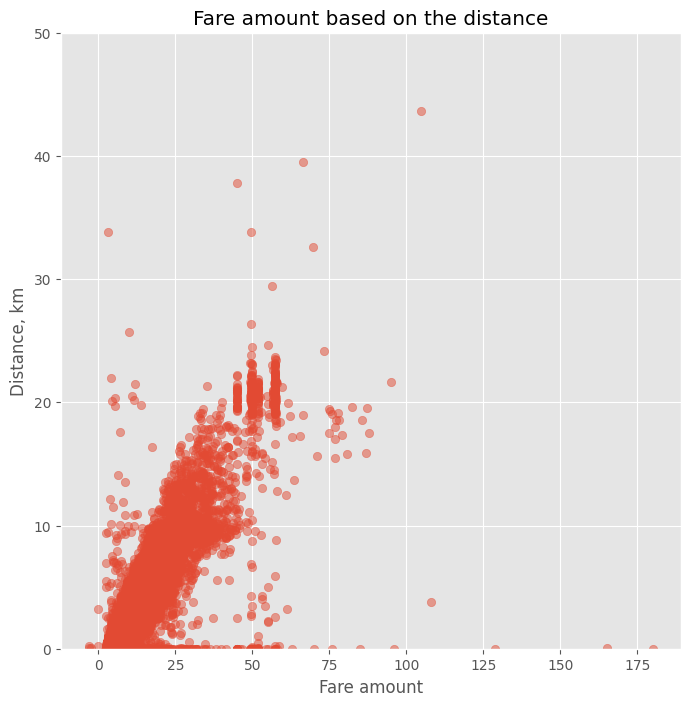

In [21]:
# Calculate the ride distance
train['distance_km'] = haversine_distance(train)

# Draw a scatterplot
plt.scatter(x=train['fare_amount'], y=train['distance_km'], alpha=0.5)
plt.xlabel('Fare amount')
plt.ylabel('Distance, km')
plt.title('Fare amount based on the distance')

# Limit on the distance
plt.ylim(0, 50)

Nice plot! It's obvious now that there is a clear dependency between ride distance and fare amount. So, ride distance is, probably, a good feature. Let's find some others!

### EDA plots II
  
Another idea that comes to mind is that the price of a ride could change during the day.
  
Your goal is to plot the median fare amount for each hour of the day as a simple line plot. The hour feature is calculated for you. Don't worry if you do not know how to work with the date features. We will explore them in the chapter on Feature Engineering.
  
---
  
1. Group `train` DataFrame by `"hour"` and calculate the median for the `"fare_amount"` column.
2. Using `hour_price` DataFrame obtained, plot a line with `"hour"` on the x axis and `"fare_amount"` on the y axis.

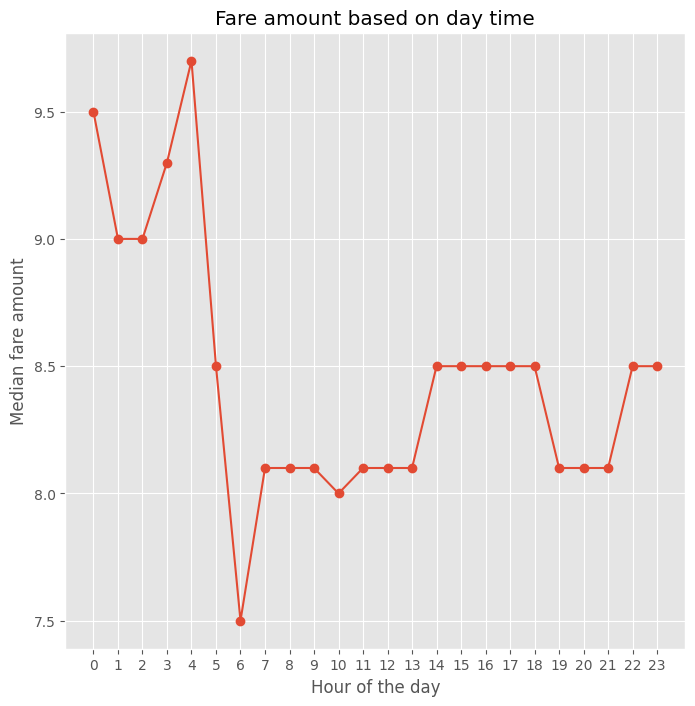

In [24]:
# Create hour feature
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['hour'] = train.pickup_datetime.dt.hour

# Find median fare_amount for each hour
hour_price = train.groupby('hour', as_index=False)['fare_amount'].median()

# Plot the line plot
plt.plot(hour_price['hour'], hour_price['fare_amount'], marker='o')
plt.xlabel('Hour of the day')
plt.ylabel('Median fare amount')
plt.title('Fare amount based on day time')
plt.xticks(range(24))
plt.show()

Great! We see that prices are a bit higher during the night. It is a good indicator that we should include the `"hour"` feature in the final model, or at least add a binary feature `"is_night"`. Move on to the next lesson to learn how to check whether new features are useful for the model or not!

## Local validation
  
After some preliminary steps, we come to one of the crucial parts of the solution process: local validation.
  
**Motivation**
  
Before we start, let's discuss the motivation for local validation. Recall the plot with possible overfitting to Public test data. The problem we observe here is that we can't detect the moment when our model starts overfitting by looking only at the Public Leaderboard. That's where local validation comes into play. Using only train data, we want to build some kind of an internal, or local, approximation of the model's performance on a Private test data.
  
<center><img src='../_images/local-validation-kaggle.png' alt='img' width='740'></center>
  
**Holdout set**
  
The question is: how do we build such an approximation of the model's performance? The simplest way is to use a holdout set. We split all train data (in other words, all the observations we know the target variable for) into train and holdout sets.
  
<center><img src='../_images/local-validation-kaggle1.png' alt='img' width='740'></center>
  
We then build a model using only the train set and make predictions on the holdout set. So, the holdout is similar to the usual test data, but the target variable is known.
  
<center><img src='../_images/local-validation-kaggle2.png' alt='img' width='740'></center>
  
It allows to compare predictions with the actual values and gives us a fair estimate of the model's performance. However, such an approach is similar to just looking at the results on the Public Leaderboard. We always use the same data for model evaluation and could potentially overfit to it. A better idea is to use cross-validation.
  
<center><img src='../_images/local-validation-kaggle3.png' alt='img' width='740'></center>
  
**K-fold cross-validation**
  
The process of K-fold cross-validation is presented on the slide. We split the train data into $K$ non-overlapping parts called 'folds' (in this case $K$ is equal to 4).
  
<center><img src='../_images/local-validation-kaggle4.png' alt='img' width='740'></center>
  
Then train a model $K$ times on all the data except for a single fold. Each time, we also measure the quality on this single fold the model has never seen before. K-fold cross-validation gives our model the opportunity to train on multiple train-test splits instead of using a single holdout set. This gives us a better indication of how well our model will perform on unseen data.
  
<center><img src='../_images/local-validation-kaggle5.png' alt='img' width='740'></center>
  
To apply K-fold cross-validation with scikit-learn, import it from the `model_selection` module. Create a KFold object with the following parameters: `n_splits=` is the number of folds, `shuffle=` is whether the data is sorted before splitting. Generally, it's better to always set this parameter to True. And `random_state=` sets a seed to reproduce the same folds in any future run. Now, we need to train K models for each cross-validation split. To obtain all the splits we call the `.split()` method of the `KFold` object with a train data as an argument. It returns a list of training and testing observations for each split. The observations are given as numeric indices in the train data. These indices could be used inside the loop to select training and testing folds for the corresponding cross-validation split. For `pandas` DataFrame it could be done using the `.iloc` operator, for example.
  
<center><img src='../_images/local-validation-kaggle6.png' alt='img' width='740'></center>
  
**Stratified K-fold**
  
Another approach for cross-validation is stratified K-fold. It is the same as usual K-fold, but creates stratified folds by a target variable. These folds are made by preserving the percentage of samples for each class of this variable. As we see on the image, each fold has the same classes distribution as in the initial data. It is useful when we have a classification problem with high class imbalance in the target variable or our data size is very small.
  
<center><img src='../_images/local-validation-kaggle7.png' alt='img' width='740'></center>
  
Stratified K-fold is also located in sklearn's `model_selection` module. It has the same parameters as the usual `KFold`: `n_splits=`, `shuffle=` and `random_state=`. The only difference is that on top of the train data, we should also pass the target variable into the `.split()` call in order to make a stratification.
  
<center><img src='../_images/local-validation-kaggle8.png' alt='img' width='740'></center>
  
**Let's practice!**
  
As you can see, there are various validation strategies available. Let's try them out!

### K-fold cross-validation
  
You will start by getting hands-on experience in the most commonly used K-fold cross-validation.
  
The data you'll be working with is from the "Two sigma connect: rental listing inquiries" Kaggle competition. The competition problem is a multi-class classification of the rental listings into 3 classes: low interest, medium interest and high interest. For faster performance, you will work with a subsample consisting of 1,000 observations.
  
You need to implement a K-fold validation strategy and look at the sizes of each fold obtained. `train` DataFrame is already available in your workspace.
  
---
  
1. Create a `KFold` object with 3 folds.
2. Loop over each split using the kf object.
3. For each split select training and testing folds using `train_index` and `test_index`.

In [25]:
train = pd.read_csv('../_datasets/twosigma_rental_train.csv')
print(train.shape)
train.head()

(1000, 9)


,id,bathrooms,bedrooms,building_id,latitude,longitude,manager_id,price,interest_level
0,10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,40.7145,-73.9425,5ba989232d0489da1b5f2c45f6688adc,3000,medium
1,10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,40.7947,-73.9667,7533621a882f71e25173b27e3139d83d,5465,low
2,100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,40.7388,-74.0018,d9039c43983f6e564b1482b273bd7b01,2850,high
3,100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,40.7539,-73.9677,1067e078446a7897d2da493d2f741316,3275,low
4,100013,1.0,4,0,40.8241,-73.9493,98e13ad4b495b9613cef886d79a6291f,3350,low


In [26]:
from sklearn.model_selection import KFold

# Create a KFold object
kf = KFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0  # Counter

for train_index, test_index in kf.split(train):
    # Obtain training and test folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print("Fold: {}".format(fold))
    print("CV train shape: {}".format(cv_train.shape))
    print("Medium interest listings in CV train: {}\n".format(sum(cv_train.interest_level == 'medium')))
    fold += 1

Fold: 0
CV train shape: (666, 9)
Medium interest listings in CV train: 175

Fold: 1
CV train shape: (667, 9)
Medium interest listings in CV train: 165

Fold: 2
CV train shape: (667, 9)
Medium interest listings in CV train: 162



So, we see that the number of observations in each fold is almost uniform. It means that we've just splitted the train data into 3 equal folds. However, if we look at the number of medium-interest listings, it's varying from 162 to 175 from one fold to another. To make them uniform among the folds, let's use Stratified K-fold!

### Stratified K-fold
  
As you've just noticed, you have a pretty different target variable distribution among the folds due to the random splits. It's not crucial for this particular competition, but could be an issue for the classification competitions with the highly imbalanced target variable.
  
To overcome this, let's implement the stratified K-fold strategy with the stratification on the target variable. `train` DataFrame is already available in your workspace.
  
---
  
1. Create a `StratifiedKFold` object with 3 folds and shuffling.
2. Loop over each split using `str_kf` object. Stratification is based on the `"interest_level"` column.
3. For each split select training and testing folds using `train_index` and `test_index`.

In [27]:
from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
str_kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

# Loop through each split
fold = 0  # Counter
for train_index, test_index in str_kf.split(train, train['interest_level']):
    # Obtain training and test folds
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    print('Fold: {}'.format(fold))
    print('CV train shape: {}'.format(cv_train.shape))
    print('Medium interest listings in CV train: {}\n'.format(sum(cv_train.interest_level == 'medium')))
    fold += 1

Fold: 0
CV train shape: (666, 9)
Medium interest listings in CV train: 167

Fold: 1
CV train shape: (667, 9)
Medium interest listings in CV train: 167

Fold: 2
CV train shape: (667, 9)
Medium interest listings in CV train: 168



Great! Now you see that both size and target distribution are the same among the folds. The general rule is to prefer **Stratified K-Fold over usual K-Fold in any classification problem.** Move to the next lesson to learn about other cross-validation strategies!

## Validation usage
  
In the previous lesson, we've learned about basic cross-validation strategies. Now, we'll consider one more and also explore the general validation process.
  
**Data leakage**
  
To start with, let's introduce a new term called 'data leakage'. Leakage causes a model to seem accurate until we start making predictions in a real-world environment. We then realize that the model is of low quality and becomes absolutely useless. There are different types of data leakage. The first one is a leak in the features. It means that we're using data that will not be available in the production setting. For example, predicting sales in US dollars, while having exactly the same sales in UK pounds as a feature. Another one is a leak in the validation strategy. It occurs when the validation strategy does not replicate the real-world situation. We will see an example in the next slide.
  
<center><img src='../_images/validation-usage-kaggle.png' alt='img' width='740'></center>
  
**Time data**
  
Suppose we're solving the problem with time series data. As a validation strategy, we selected the usual K-fold. The folds distribution for $K$ equals four is presented on the slide. What leakage can we observe here? What's wrong with a simple K-fold strategy? The problem here is that in the second split we'll build a model using data from the future! Obviously, in the real-world setting, we will not have access to the future data. Therefore, this is an example of leakage in the validation strategy.
  
<center><img src='../_images/validation-usage-kaggle1.png' alt='img' width='740'></center>
  
**Time K-fold cross-validation**
  
Thus, we need to be more careful with the time data. One of the possible approaches is time K-fold cross-validation. The underlying idea is to provide multiple splits in such a manner that we train only on past data while always predicting the future.
  
<center><img src='../_images/validation-usage-kaggle2.png' alt='img' width='740'></center>
  
**Time K-fold cross-validation**
  
Time K-fold cross-validation is also available in scikit-learn `model_selection`. Let's create a `TimeSeriesSplit` object with 5 splits. Before applying it to the data, we need to sort the train DataFrame by date. And then, as usual, iterate through each cross-validation split.
  
<center><img src='../_images/validation-usage-kaggle3.png' alt='img' width='740'></center>
  
**Validation pipeline**
  
OK, we've considered various cross-validation strategies. Now, let's define the general pipeline of the validation process for any cross-validation scheme. Firstly, create an empty list where we will store the model's results. Split train data into folds. Here, CV_STRATEGY object should be substituted with the strategy we're using. Then, for each cross-validation split, we perform the following steps. Train a model using all except for a single fold. Make predictions on this unseen single fold. Calculate the competition metric and append it to the list of folds metrics. As a result, we have a list of $K$ numbers representing model quality for each fold.
  
<center><img src='../_images/validation-usage-kaggle4.png' alt='img' width='740'></center>
  
**Model comparison**
  
Now we could train two different models and for each model get a list of $K$ numbers. For example, we have Models A and B with mean squared errors in four folds. Our goal is to select the model with better quality. However, it's hard to make conclusions comparing $K$ numbers simultaneously. So, the next step is to transform $K$ fold scores into a single overall validation score.
  
<center><img src='../_images/validation-usage-kaggle5.png' alt='img' width='740'></center>
  
**Overall validation score**
  
The simplest way to obtain a single number is to find the mean over all fold scores. However, the mean is not usually a good choice, because it does not take into account score deviation from one fold to another. We could get a very good score for a single fold, while the performance on the rest $K$-1 folds is poor. Let's define a more reliable overall validation score. It uses the worst-case scenario considering validation score one standard deviation away from the mean. We add standard deviation if the competition metric is being minimized and subtract standard deviation if the metric is being maximized.
  
<center><img src='../_images/validation-usage-kaggle6.png' alt='img' width='740'></center>
  
**Model comparison**
  
In our example, taking the mean over all folds suggests that Model B has a lower error. However, if we calculate the overall score taking into account the scores deviation. It occurs that, actually, model A is a bit better.
  
<center><img src='../_images/validation-usage-kaggle7.png' alt='img' width='740'></center>
  
**Let's practice!**
  
All right, enough words! Let's try all these ideas on practice!

### Time K-fold
  
Remember the "Store Item Demand Forecasting Challenge" where you are given store-item sales data, and have to predict future sales?
  
It's a competition with time series data. So, time K-fold cross-validation should be applied. Your goal is to create this cross-validation strategy and make sure that it works as expected.
  
Note that the `train` DataFrame is already available in your workspace, and that `TimeSeriesSplit` has been imported from `sklearn.model_selection`.
  
---
  
1. Create a `TimeSeriesSplit` object with 3 splits.
2. Sort the train data by "date" column to apply time K-fold.
3. Loop over each time split using `time_kfold` object.
4. For each split select training and testing folds using `train_index` and `test_index`.

In [28]:
train = pd.read_csv('../_datasets/demand_forecasting_train_1_month.csv')
print(train.shape)
train.head()

(15500, 5)


,id,date,store,item,sales
0,100000,2017-12-01,1,1,19
1,100001,2017-12-02,1,1,16
2,100002,2017-12-03,1,1,31
3,100003,2017-12-04,1,1,7
4,100004,2017-12-05,1,1,20


In [29]:
from sklearn.model_selection import TimeSeriesSplit

# Create TimeSeriesSplit object
time_kfold = TimeSeriesSplit(n_splits=3)

# sort train data by date
train = train.sort_values('date')

# Iterate through each split
fold = 0  # Counter
for train_index, test_index in time_kfold.split(train):
    cv_train, cv_test = train.iloc[train_index], train.iloc[test_index]
    
    print('Fold :', fold)
    print('Train date range: from {} to {}'.format(cv_train.date.min(), cv_train.date.max()))
    print('Test date range: from {} to {}\n'.format(cv_test.date.min(), cv_test.date.max()))
    fold += 1

Fold : 0
Train date range: from 2017-12-01 to 2017-12-08
Test date range: from 2017-12-08 to 2017-12-16

Fold : 1
Train date range: from 2017-12-01 to 2017-12-16
Test date range: from 2017-12-16 to 2017-12-24

Fold : 2
Train date range: from 2017-12-01 to 2017-12-24
Test date range: from 2017-12-24 to 2017-12-31



Great! You've applied time K-fold cross-validation strategy for the demand forecasting. Look at the output. It works as expected, training only on the past data and predicting the future. Progress to the next exercise to evaluate different models!

### Overall validation score
  
Now it's time to get the actual model performance using cross-validation! How does our store item demand prediction model perform?
  
Your task is to take the Mean Squared Error (MSE) for each fold separately, and then combine these results into a single number.
  
For simplicity, you're given `get_fold_mse()` function that for each cross-validation split fits a Random Forest model and returns a list of MSE scores by fold. `get_fold_mse()` accepts two arguments: `train` and `TimeSeriesSplit` object.
  
---
  
1. Create time 3-fold cross-validation.
2. Print the `numpy` mean of MSE scores by folds.
3. Print the list of MSEs by fold.
4. To calculate the overall score, find the sum of MSE mean and standard deviation.

In [30]:
from sklearn.ensemble import RandomForestRegressor

def get_fold_mse(train, kf):
    mse_scores = []
    
    for train_index, test_index in kf.split(train):
        fold_train, fold_test = train.loc[train_index], train.loc[test_index]

        # Fit the data and make predictions
        # Create a Random Forest object
        rf = RandomForestRegressor(n_estimators=10, random_state=123)

        # Train a model
        rf.fit(X=fold_train[['store', 'item']], y=fold_train['sales'])

        # Get predictions for the test set
        pred = rf.predict(fold_test[['store', 'item']])
    
        fold_score = round(mean_squared_error(fold_test['sales'], pred), 5)
        mse_scores.append(fold_score)
        
    return mse_scores

In [31]:
# Initialize 3-fold time cross-validation
kf = TimeSeriesSplit(n_splits=3)

# Get MSE scores for each cross-validation split
mse_scores = get_fold_mse(train, kf)

print('Mean validation MSE: {:.5f}'.format(np.mean(mse_scores)))
print('MSE by fold: {}'.format(mse_scores))
print('Overall Validation MSE: {:.5f}'.format(np.mean(mse_scores) + np.std(mse_scores)))

Mean validation MSE: 955.49186
MSE by fold: [890.30336, 961.65797, 1014.51424]
Overall Validation MSE: 1006.38784


Congratulations, you've mastered it! Now, you know different validation strategies as well as how to use them to obtain overall model performance. It's time for the next and the most interesting part of the solution process: Feature Engineering and Modeling. See you in the next Chapters!